In [70]:
#important Libraries 

import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/data\db\collection-0--2641255188981931325.wt
/data\db\collection-0--7375170263173339037.wt
/data\db\collection-0-4572410231294925841.wt
/data\db\collection-0-7067964211854103265.wt
/data\db\collection-0-8938152883700851741.wt
/data\db\collection-2-7067964211854103265.wt
/data\db\collection-4-7067964211854103265.wt
/data\db\index-1--2641255188981931325.wt
/data\db\index-1--7375170263173339037.wt
/data\db\index-1-4572410231294925841.wt
/data\db\index-1-7067964211854103265.wt
/data\db\index-1-8938152883700851741.wt
/data\db\index-3-7067964211854103265.wt
/data\db\index-5-7067964211854103265.wt
/data\db\index-6-7067964211854103265.wt
/data\db\mongod.lock
/data\db\sizeStorer.wt
/data\db\storage.bson
/data\db\WiredTiger
/data\db\WiredTiger.lock
/data\db\WiredTiger.turtle
/data\db\WiredTiger.wt
/data\db\WiredTigerLAS.wt
/data\db\_mdb_catalog.wt
/data\db\diagnostic.data\metrics.2018-08-20T15-03-55Z-00000
/data\db\diagnostic.data\metrics.2018-08-24T17-42-51Z-00000
/data\db\diagnostic.data\metr

# Covid-19 World data visualization

In [71]:
df=pd.read_csv("data-world/covid_19_data.csv")
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [72]:
df.shape

(39347, 8)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39347 entries, 0 to 39346
Data columns (total 8 columns):
SNo                39347 non-null int64
ObservationDate    39347 non-null object
Province/State     21670 non-null object
Country/Region     39347 non-null object
Last Update        39347 non-null object
Confirmed          39347 non-null float64
Deaths             39347 non-null float64
Recovered          39347 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 2.4+ MB


In [74]:
df['ObservationDate']=pd.to_datetime(df['ObservationDate'])
df['Last Update']=pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

Since the final count of cases is present on 10th June 2020 we will create a separate dataframe for the same

In [75]:
from datetime import date
recent=df[['ObservationDate']][-1:].max()
df_update=df.loc[df.ObservationDate==pd.Timestamp(recent['ObservationDate'])]
df_update

SNo ObservationDate      Province/State  Country/Region  \
38622  38623      2020-06-10                 NaN     Afghanistan   
38623  38624      2020-06-10                 NaN         Albania   
38624  38625      2020-06-10                 NaN         Algeria   
38625  38626      2020-06-10                 NaN         Andorra   
38626  38627      2020-06-10                 NaN          Angola   
...      ...             ...                 ...             ...   
39342  39343      2020-06-10           Zacatecas          Mexico   
39343  39344      2020-06-10  Zakarpattia Oblast         Ukraine   
39344  39345      2020-06-10   Zaporizhia Oblast         Ukraine   
39345  39346      2020-06-10            Zhejiang  Mainland China   
39346  39347      2020-06-10     Zhytomyr Oblast         Ukraine   

              Last Update  Confirmed  Deaths  Recovered  
38622 2020-06-11 03:33:41      22142     405       3013  
38623 2020-06-11 03:33:41       1341      34        980  
38624 2020-06-11 03:33:41      10484     732       7074  
38625 2020-06-11 03:33:41        852      51        759  
38626 2020-06-11 03:33:41        113       4         40  
...                   ...        ...     ...        ...  
39342 2020-06-11 03:33:41        423      53        266  
39343 2020-06-11 03:33:41       1448      33        628  
39344 2020-06-11 03:33:41        502      15        296  
39345 2020-06-11 03:33:41       1268       1       1267  
39346 2020-06-11 03:33:41        973      17        501  

[725 rows x 8 columns]

In [76]:
df_update.isnull().sum()

SNo                  0
ObservationDate      0
Province/State     170
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

Out of the 39347 records we are now left with only 725 and many of the records dont have a Province defined.
These are mostly provinces that are not part of China

Wherever Province is null, we replace it with the Country name and we group Mainland China and China together in China

In [77]:
df_update['Province/State']=df_update.apply(lambda x: x['Country/Region']
if pd.isnull(x['Province/State']) else x['Province/State'],axis=1)

df['Province/State']=df.apply(lambda x: x['Country/Region'] if pd.isnull
(x['Province/State']) else x['Province/State'],axis=1)

In [78]:
df_update['Country/Region']=df_update.apply(lambda x:'China' if x['Country/Region']
=='Mainland China' else x['Country/Region'],axis=1)

df_update['Country/Region']=df.apply(lambda x:'China' if x['Country/Region']
=='Mainland China' else x['Country/Region'],axis=1)

In [79]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_update['ProvinceID'] = le.fit_transform(df_update['Province/State'])
df_update['CountryID']=le.fit_transform(df_update['Country/Region'])
df_update.head()

SNo ObservationDate Province/State Country/Region  \
38622  38623      2020-06-10    Afghanistan    Afghanistan   
38623  38624      2020-06-10        Albania        Albania   
38624  38625      2020-06-10        Algeria        Algeria   
38625  38626      2020-06-10        Andorra        Andorra   
38626  38627      2020-06-10         Angola         Angola   

              Last Update  Confirmed  Deaths  Recovered  ProvinceID  CountryID  
38622 2020-06-11 03:33:41      22142     405       3013           3          0  
38623 2020-06-11 03:33:41       1341      34        980          10          1  
38624 2020-06-11 03:33:41      10484     732       7074          12          2  
38625 2020-06-11 03:33:41        852      51        759          22          3  
38626 2020-06-11 03:33:41        113       4         40          23          4

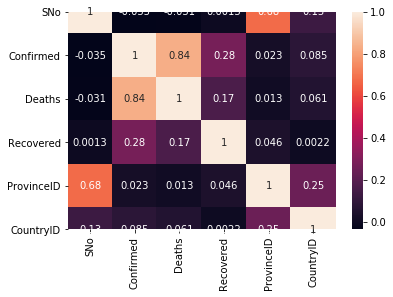

In [80]:
corr=df_update.corr()
sns.heatmap(corr,annot=True)

# Printing the unique countries and their count

In [81]:
print(df['Country/Region'].unique())
print("\n Number of Countries impacted by Covid-19 : ",len(df['Country/Region'].unique()))

['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal' 'Canada' 'Cambodia'
 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates'
 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain' 'Belgium' 'Others' 'Egypt'
 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman' 'Afghanistan' 'Bahrain' 'Kuwait'
 'Austria' 'Algeria' 'Croatia' 'Switzerland' 'Pakistan' 'Georgia' 'Greece'
 'North Macedonia' 'Norway' 'Romania' 'Denmark' 'Estonia' 'Netherlands'
 'San Marino' ' Azerbaijan' 'Belarus' 'Iceland' 'Lithuania' 'New Zealand'
 'Nigeria' 'North Ireland' 'Ireland' 'Luxembourg' 'Monaco' 'Qatar'
 'Ecuador' 'Azerbaijan' 'Czech Republic' 'Armenia' 'Dominican Republic'
 'Indonesia' 'Portugal' 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia'
 'Senegal' 'Argentina' 'Chile' 'Jordan' 'Ukraine' 'Saint Barthelemy'
 'Hungary' 'Faroe Islands' 'Gibraltar' 'Liechtenstein' 'Poland' 'Tunisia

# Representation of confirmed cases per country

US leads with 27.18% of the confirmed cases all over the world. This scenario is in total contrast to the initial days when China accounted for nearly 99% of the cases. The growth rate for US has slowed down in the past few days. The numbers in Brazil and Russia have increased drastically placing them in 2nd and 3rd spot.India moved to 5th place with respect to the number of confirmed cases taking over Spain.

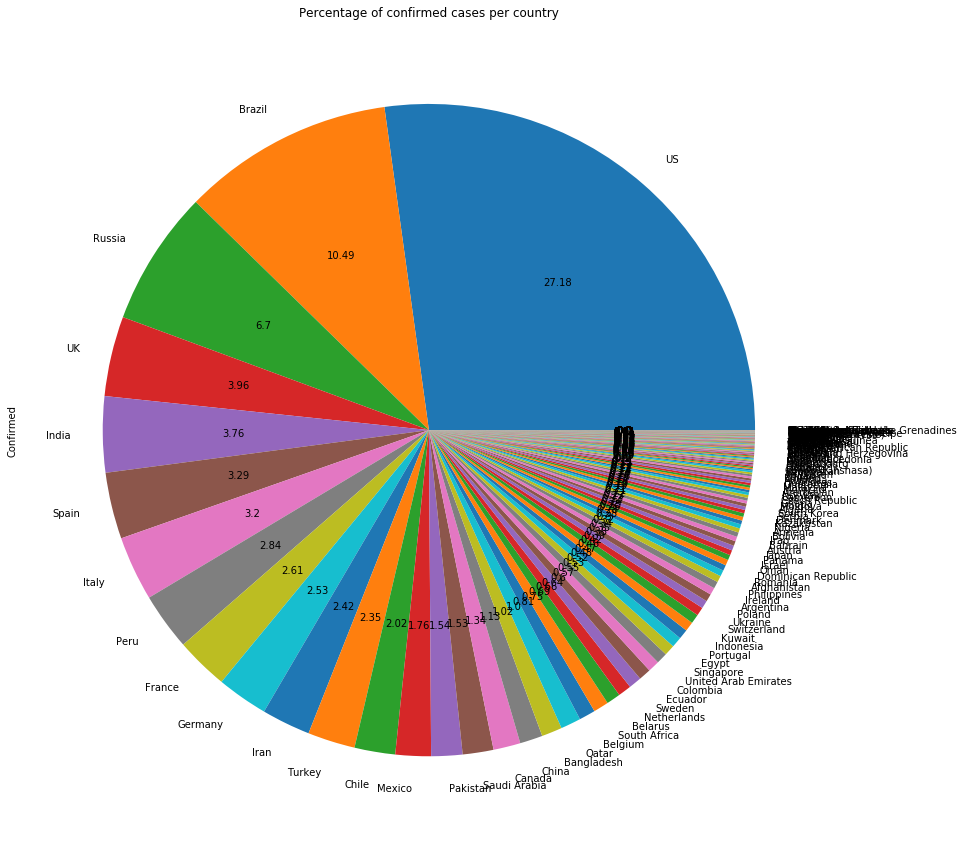

In [82]:
fig=plt.figure(figsize=(15,15))
conf_per_country = df_update.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
conf_sum=df_update['Confirmed'].sum()
def absolute_value(val):
    a=val
    return (np.round(a,2))
conf_per_country.plot(kind="pie",title='Percentage of confirmed cases per country'
,autopct=absolute_value)
plt.show()

In [83]:
group_cases=df_update[['Confirmed','Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Confirmed',ascending=False).head()
group_cases=group_cases.reset_index()
group_cases

Country/Region  Confirmed  Recovered  Deaths
0             US    2000464     533504  112924
1         Brazil     772416     413916   39680
2         Russia     493023     252295    6350
3             UK     291588       1269   41213
4          India     276583     135206    7745

Germany leads in the recovery rate in the top 10 countries affected by Covid-19.

In [84]:
group_cases['Recovery Rate']=round(group_cases['Recovered']/group_cases['Confirmed'],2)
group_cases['Death Rate']=round(group_cases['Deaths']/group_cases['Confirmed'],2)
group_cases=group_cases.sort_values(by='Confirmed',ascending=False)
group_cases.style.background_gradient(cmap='Greens')


From the below stacked barplot we see that highest number of confirmed cases is in US now

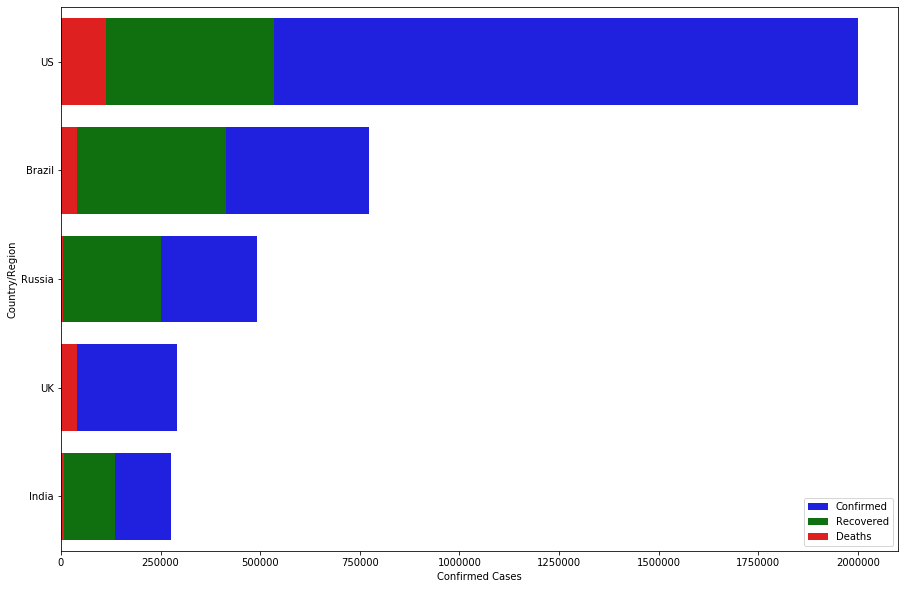

In [85]:
f,ax=plt.subplots(figsize=(15,10))
bar1=sns.barplot(x='Confirmed',y='Country/Region',data=group_cases,label='Confirmed',color='b')
bar2=sns.barplot(x='Recovered',y='Country/Region',data=group_cases,label='Recovered',color='g')
bar3=sns.barplot(x='Deaths',y='Country/Region',data=group_cases,label='Deaths',color='r')
ax.legend(loc=4, ncol = 1)
plt.xlabel("Confirmed Cases")
plt.show()


The ratio of recovered and death cases are shown below for the top 5 countries that have reported 
max deaths. UK has seen more deaths than recoveries while US leads in the number of deaths due 
to COVID19

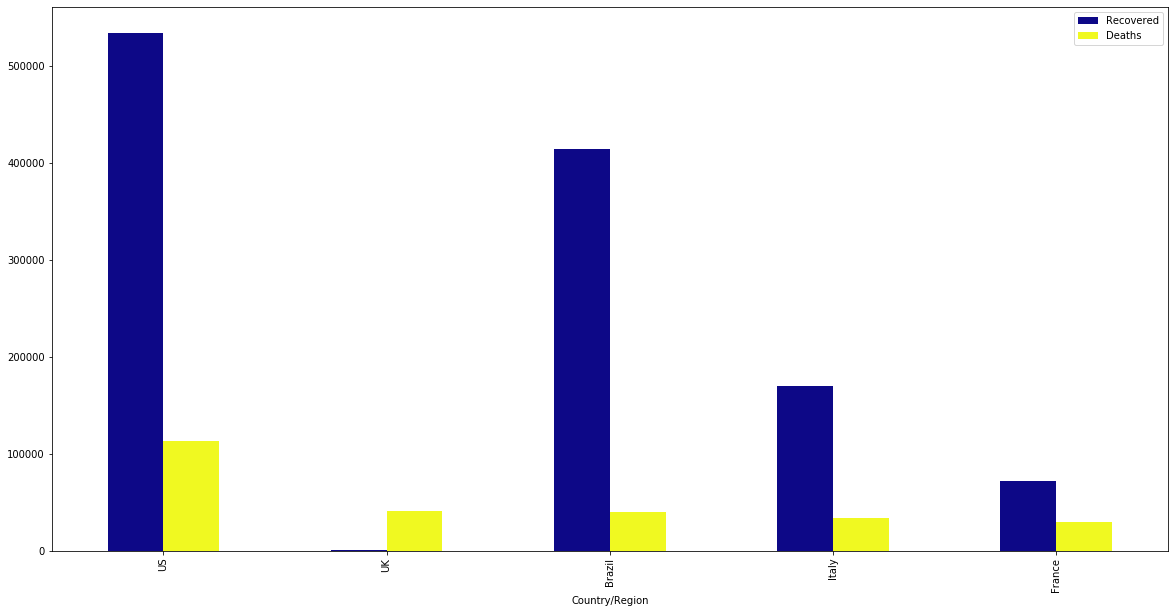

In [86]:
group_cases=df_update[['Recovered','Deaths','Country/Region']].groupby('Country/Region').sum().sort_values('Deaths',ascending=False).head()
group_cases.plot(kind='bar',width=0.5,colormap='plasma',figsize=(20,10))
plt.show()

# Time Plot of Covid-19 in world

In [88]:
corona_data=pd.read_csv('data-world/covid_19_data.csv')
choro_map=px.choropleth(corona_data, 
                    locations="Country/Region", 
                    locationmode = "country names",
                    color="Confirmed", 
                    hover_name="Country/Region", 
                    animation_frame="ObservationDate"
                   )

choro_map.update_layout(
    title_text = 'Global Spread of Coronavirus',
    title_x = 0.5,
    geo=dict(
        showframe = False,
        showcoastlines = False,
    ))
    
choro_map.show()

# Covid-19 India Data Visualization Upto 10 june

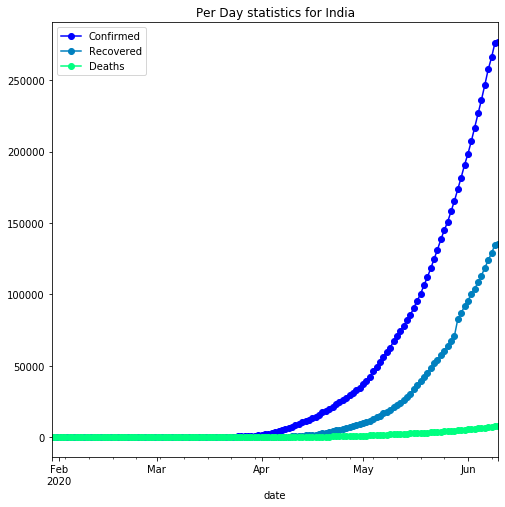

In [89]:
india_cases_complete=df.loc[df['Country/Region']=='India']
india_cases_complete['date'] = india_cases_complete['ObservationDate'].dt.date
india_cases_complete['date']=pd.to_datetime(india_cases_complete['date'])
india_cases_complete = india_cases_complete[india_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot = india_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for India',marker='o')
num_plot_india=num_plot.reset_index()

In [90]:
num_plot_india['Confirmed Case Increase']=0
num_plot_india['Death Case Increase']=0
num_plot_india['Confirmed Case Increase'][0]=0
num_plot_india['Death Case Increase'][0]=0
for i in range(1,num_plot_india.shape[0]):
    num_plot_india['Confirmed Case Increase'][i]=-(num_plot_india.iloc[i-1][1]-num_plot_india.iloc[i][1])
    num_plot_india['Death Case Increase'][i]=-(num_plot_india.iloc[i-1][3]-num_plot_india.iloc[i][3])
num_plot_india.tail(10)

date  Confirmed  Recovered  Deaths  Confirmed Case Increase  \
123 2020-06-01     198370      95754    5608                     7761   
124 2020-06-02     207191     100285    5829                     8821   
125 2020-06-03     216824     104071    6088                     9633   
126 2020-06-04     226713     108450    6363                     9889   
127 2020-06-05     236184     113233    6649                     9471   
128 2020-06-06     246622     118695    6946                    10438   
129 2020-06-07     257486     123848    7207                    10864   
130 2020-06-08     265928     129095    7473                     8442   
131 2020-06-09     276146     134670    7750                    10218   
132 2020-06-10     276583     135206    7745                      437   

     Death Case Increase  
123                  200  
124                  221  
125                  259  
126                  275  
127                  286  
128                  297  
129                  261  
130                  266  
131                  277  
132                   -5

7th June has recorded highest number of COVID19 confirmed cases in India in a day (10864). We notice 
a peak in every 4-5 days however in the last few days the peak in cases have been increasing almost 
everyday.10th June does not show correct number of confirmed cases

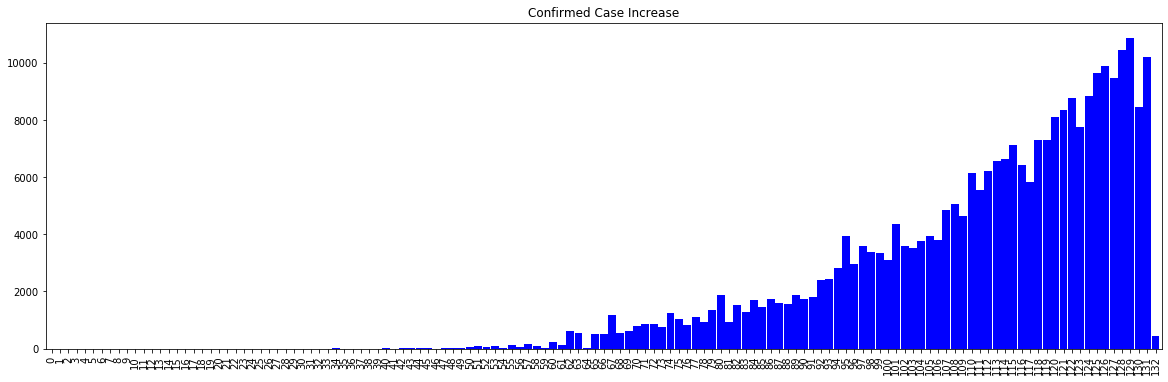

In [91]:
num_plot_india['Confirmed Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Confirmed Case Increase')
plt.show()


There seems to be an issue with an extra death reported on Day 50 due to which on Day 51 we see a downtrend.Highest number of deaths reported in a day is 297 for India which was on 6th June.

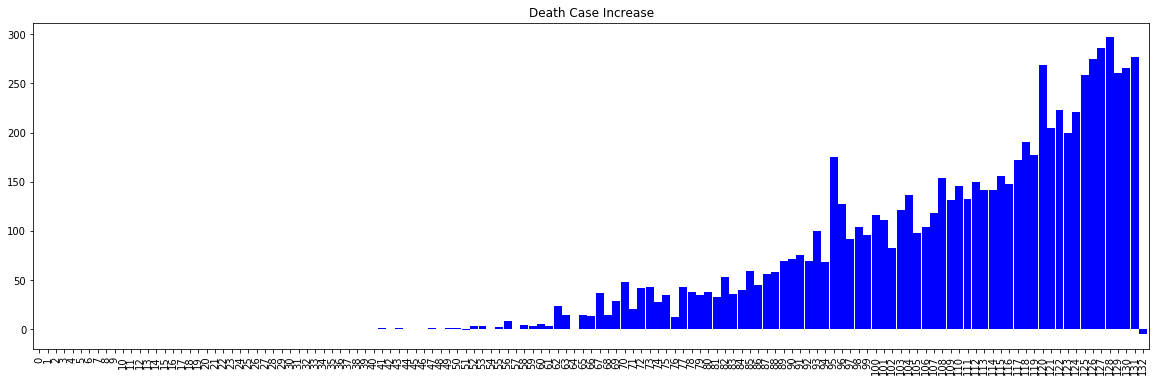

In [100]:
num_plot_india['Death Case Increase'].plot(kind='bar',width=0.95,colormap='winter',figsize=(20,6),title='Death Case Increase')
plt.show()

# Trajectories for some of the countries

Trajectory of India is increasing almost linearly just like US 

In [93]:
from sklearn.preprocessing import LabelEncoder
from plotly.offline import iplot, init_notebook_mode
import math
import bokeh 
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import urlopen
import json
from dateutil import parser
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.resources import INLINE
from bokeh.io import output_notebook
from bokeh.models import Span
import warnings
warnings.filterwarnings("ignore")
output_notebook(resources=INLINE)
le=LabelEncoder()

df.rename(columns={'Country/Region': 'Country', 'ObservationDate': 'Date'}, inplace=True)
df = df.fillna('unknown')
df['Country'] = df['Country'].str.replace('US','United States')
df['Country'] = df['Country'].str.replace('UK','United Kingdom') 
df['Country'] = df['Country'].str.replace('Mainland China','China')
df['Code']=le.fit_transform(df['Country'])
virus_data = df
#print(virus_data.head())
#print(len(virus_data))

top_country = virus_data.loc[virus_data['Date'] == virus_data['Date'].iloc[-1]]
top_country = top_country.groupby(['Code','Country'])['Confirmed'].sum().reset_index()
top_country = top_country.sort_values('Confirmed', ascending=False)
top_country = top_country[:60]
top_country_codes = top_country['Country']
top_country_codes = list(top_country_codes)
#print(top_country)

countries = virus_data[virus_data['Country'].isin(top_country_codes)]
countries_day = countries.groupby(['Date','Code','Country'])['Confirmed','Deaths','Recovered'].sum().reset_index()
#print(countries_day)


exponential_line_x = []
exponential_line_y = []
for i in range(16):
    exponential_line_x.append(i)
    exponential_line_y.append(i)

china = countries_day.loc[countries_day['Code']==43]

new_confirmed_cases_china = []
new_confirmed_cases_china.append( list(china['Confirmed'])[0] - list(china['Deaths'])[0] 
                           - list(china['Recovered'])[0] )

for i in range(1,len(china)):

    new_confirmed_cases_china.append( list(china['Confirmed'])[i] - 
                                     list(china['Deaths'])[i] - 
                                     list(china['Recovered'])[i])
    
    
italy = countries_day.loc[countries_day['Code']==102]

new_confirmed_cases_ita = []
new_confirmed_cases_ita.append( list(italy['Confirmed'])[0] - list(italy['Deaths'])[0] 
                           - list(italy['Recovered'])[0] )

for i in range(1,len(italy)):
    
    new_confirmed_cases_ita.append( list(italy['Confirmed'])[i] - 
                                  list(italy['Deaths'])[i] - 
                                  list(italy['Recovered'])[i])
    
    
skorea = countries_day.loc[countries_day['Code']==186]

new_confirmed_cases_skorea = []
new_confirmed_cases_skorea.append( list(skorea['Confirmed'])[0] - list(skorea['Deaths'])[0] 
                           - list(skorea['Recovered'])[0] )

for i in range(1,len(skorea)):
    
    new_confirmed_cases_skorea.append( list(skorea['Confirmed'])[i] - 
                                     list(skorea['Deaths'])[i] - 
                                    list(skorea['Recovered'])[i])
    
    
india = countries_day.loc[countries_day['Code']==96]

new_confirmed_cases_india = []
new_confirmed_cases_india.append( list(india['Confirmed'])[0] - list(india['Deaths'])[0] 
                           - list(india['Recovered'])[0] )

for i in range(1,len(india)):
    
    new_confirmed_cases_india.append( list(india['Confirmed'])[i] - 
                                     list(india['Deaths'])[i] - 
                                    list(india['Recovered'])[i])
    

spain = countries_day.loc[countries_day['Code']==188]

new_confirmed_cases_spain = []
new_confirmed_cases_spain.append( list(spain['Confirmed'])[0] - list(spain['Deaths'])[0] 
                           - list(spain['Recovered'])[0] )

for i in range(1,len(spain)):
    
    new_confirmed_cases_spain.append( list(spain['Confirmed'])[i] - 
                                     list(spain['Deaths'])[i] - 
                                    list(spain['Recovered'])[i])
    

us = countries_day.loc[countries_day['Code']==211]

new_confirmed_cases_us = []
new_confirmed_cases_us.append( list(us['Confirmed'])[0] - list(us['Deaths'])[0] 
                           - list(us['Recovered'])[0] )

for i in range(1,len(us)):
    
    new_confirmed_cases_us.append( list(us['Confirmed'])[i] - 
                                     list(us['Deaths'])[i] - 
                                    list(us['Recovered'])[i])
    
    
german = countries_day.loc[countries_day['Code']==77]

new_confirmed_cases_german = []
new_confirmed_cases_german.append( list(german['Confirmed'])[0] - list(german['Deaths'])[0] 
                           - list(german['Recovered'])[0] )

for i in range(1,len(german)):
    
    new_confirmed_cases_german.append( list(german['Confirmed'])[i] - 
                                     list(german['Deaths'])[i] - 
                                    list(german['Recovered'])[i])
    
p1=figure(plot_width=800, plot_height=550, title="COVID 2019 Trajectories for Countries")
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'Total number of Confirmed Cases (Log scale)'
p1.yaxis.axis_label = 'Total number of active cases (Log scale)'


p1.line(exponential_line_x, exponential_line_y, line_dash="4 4", line_width=1)

p1.line(np.log(list(china['Confirmed'])), np.log(new_confirmed_cases_china), color='red', 
        legend='China', line_width=3)
p1.circle(np.log(list(china['Confirmed'])[-1]), np.log(new_confirmed_cases_china[-1]), size=5)

p1.line(np.log(list(italy['Confirmed'])), np.log(new_confirmed_cases_ita), color='blue', 
        legend='Italy', line_width=3)
p1.circle(np.log(list(italy['Confirmed'])[-1]), np.log(new_confirmed_cases_ita[-1]), size=5)



p1.line(np.log(list(skorea['Confirmed'])), np.log(new_confirmed_cases_skorea), color='violet', 
        legend='South Korea', line_width=3)
p1.circle(np.log(list(skorea['Confirmed'])[-1]), np.log(new_confirmed_cases_skorea[-1]), size=5)


p1.line(np.log(list(india['Confirmed'])), np.log(new_confirmed_cases_india), color='orange', 
        legend='India', line_width=3)
p1.circle(np.log(list(india['Confirmed'])[-1]), np.log(new_confirmed_cases_india[-1]), size=5)

p1.line(np.log(list(spain['Confirmed'])), np.log(new_confirmed_cases_spain), color='brown', 
        legend='Spain', line_width=3)
p1.circle(np.log(list(spain['Confirmed'])[-1]), np.log(new_confirmed_cases_spain[-1]), size=5)

p1.line(np.log(list(us['Confirmed'])), np.log(new_confirmed_cases_us), color='green', 
        legend='United States', line_width=3)
p1.circle(np.log(list(us['Confirmed'])[-1]), np.log(new_confirmed_cases_us[-1]), size=5)

p1.line(np.log(list(german['Confirmed'])), np.log(new_confirmed_cases_german), color='black', 
        legend='Germany', line_width=3)
p1.circle(np.log(list(german['Confirmed'])[-1]), np.log(new_confirmed_cases_german[-1]), size=5)

p1.legend.location = "bottom_right"
#output_file("coronavirus.html", title="COVID2019 Trajectory")
show(p1)




Loading BokehJS ...

# Data Resource of Covid-19 India

In [94]:
import requests 
import io
age_group = pd.read_csv("data/AgeGroupDetails.csv")
india_covid_19=pd.read_csv("data/covid_19_india.csv")
hospitals_beds=pd.read_csv("data/HospitalBedsIndia.csv")
individual_details=pd.read_csv("data/IndividualDetails.csv")
ICMR_labs=pd.read_csv("data/ICMRTestingLabs.csv")
state_testing=pd.read_csv("data/StatewiseTestingDetails.csv")
pos=pd.read_csv('data/UTM ZONES of INDIA.csv')
statewise_cases=pd.DataFrame(india_covid_19.groupby(['State/UnionTerritory'])['Confirmed','Deaths','Cured'].max().reset_index())
last=statewise_cases
ind_grp=last.merge(pos , left_on='State/UnionTerritory', right_on='State / Union Territory')

In [95]:
#removal of unassigned State/UnionTerritory
india_covid_19.rename(columns={'State/UnionTerritory': 'State', 'Cured': 'Recovered'}, inplace=True)
unassigned=india_covid_19[india_covid_19['State']=='Unassigned'].index
india_covid_19.drop(unassigned,axis=0,inplace=True)
unassigned1=india_covid_19[india_covid_19['State']=='Nagaland#'].index
india_covid_19.drop(unassigned1,axis=0,inplace=True)
unassigned2=india_covid_19[india_covid_19['State']=='Jharkhand#'].index
india_covid_19.drop(unassigned2,axis=0,inplace=True)
unassigned3=india_covid_19[india_covid_19['State']=='Madhya Pradesh#'].index
india_covid_19.drop(unassigned3,axis=0,inplace=True)
unassigned4=india_covid_19[india_covid_19['State']=='Cases being reassigned to states'].index
india_covid_19.drop(unassigned4,axis=0,inplace=True)

# Map View

In [96]:
import folium
map = folium.Map(location=[20.5937, 78.9629], zoom_start=4,tiles='cartodbpositron')

for lat, lon,state,Confirmed,Recovered,Deaths in zip(ind_grp['Latitude'], ind_grp['Longitude'],ind_grp['State/UnionTerritory'],ind_grp['Confirmed'],ind_grp['Cured'],ind_grp['Deaths']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='YlOrRd',
                      popup =(
                    'State/UnionTerritory: ' + str(state) + '<br>'
                    'Confirmed: ' + str(Confirmed) + '<br>'
                      'Recovered: ' + str(Recovered) + '<br>'
                      'Deaths: ' + str(Deaths) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.7 ).add_to(map)
map

# Heat Map 

In [97]:
from folium.plugins import HeatMap
m = folium.Map(location = [20.5937, 78.9629], zoom_start = 4,tiles='cartodbpositron',columns = ['State/UnionTerritory','Confirmed'],)
heat_data=[[row['Latitude'],row['Longitude']] for index, row in ind_grp.iterrows()]
HeatMap(heat_data,radius=16.5,blur= 5.5).add_to(m)

m

# Tree Plot

In [101]:
statewise_cases = pd.DataFrame(india_covid_19.groupby(['State'])['Confirmed', 'Deaths', 'Recovered'].max().reset_index())
statewise_cases["Country"] = "India" 
fig = px.treemap(statewise_cases, path=['Country','State'], values='Confirmed',color='Confirmed', hover_data=['State'])
fig.show()

# Gender-wise distribution of the COVID-19 cases

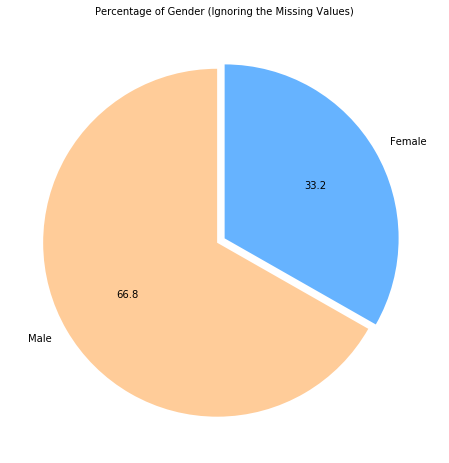

In [102]:
labels=['Male','Female']
sizes=[]
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])
explode=(0.05,0)
colors = ['#ffcc99','#66b3ff']
plt.figure(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels,colors=colors, autopct='%1.1f',startangle=90)
plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 10)
plt.show ()

In [103]:
age_group.head()

Sno AgeGroup  TotalCases Percentage
0    1      0-9          22      3.18%
1    2    10-19          27      3.90%
2    3    20-29         172     24.86%
3    4    30-39         146     21.10%
4    5    40-49         112     16.18%

# Age Distribution of Covid-19 cases in India

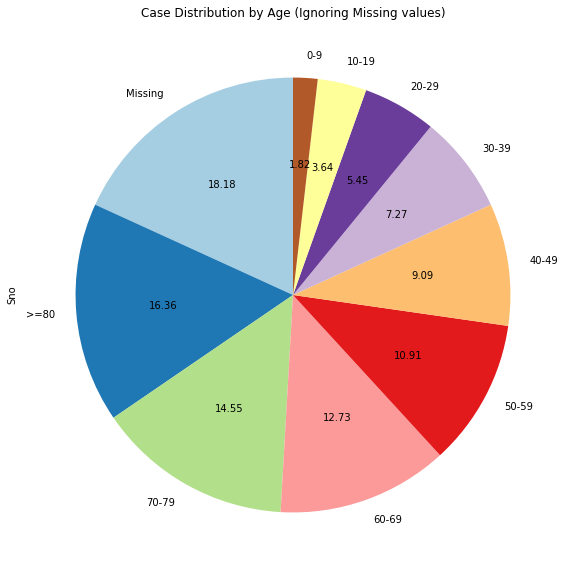

In [104]:
fig=plt.figure(figsize=(10,10))
age_group=age_group.iloc[:,:]
age_dist_india = age_group.groupby('AgeGroup')['Sno'].sum().sort_values(ascending=False)
def absolute_value(val):
    a  = val
    return (np.round(a,2))
age_dist_india.plot(kind="pie",title='Case Distribution by Age (Ignoring Missing values)',autopct=absolute_value,colormap='Paired',startangle=90)

plt.show ()

Statewise Recovery and Death Rate in India

1)Maharashtra has the highest number of Confirmed cases in India and is still contributing maximum daily cases among all the states in India.


2) Punjab has highest recovery rate among the top 20 hotspot states in India as Kerala reported fresh cases.

3)Gujarat has the highest death rate.

4)Andaman and Nicobar Islands has highest Recovery rate.

In [105]:
india_covid_19['Deaths']=india_covid_19['Deaths'].replace(['0#','NaN'],0)
india_covid_19['Deaths']=india_covid_19['Deaths'].astype('int')

In [106]:
india_covid_19.head()

Sno      Date     Time   State ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM  Kerala                       1   
1    2  31/01/20  6:00 PM  Kerala                       1   
2    3  01/02/20  6:00 PM  Kerala                       2   
3    4  02/02/20  6:00 PM  Kerala                       3   
4    5  03/02/20  6:00 PM  Kerala                       3   

  ConfirmedForeignNational  Recovered  Deaths  Confirmed  
0                        0          0       0          1  
1                        0          0       0          1  
2                        0          0       0          2  
3                        0          0       0          3  
4                        0          0       0          3

In [107]:
state_details=pd.pivot_table(india_covid_19,values=['Confirmed','Deaths','Recovered'],index='State',aggfunc='max')
state_details['Recovery Rate']=round(state_details['Recovered']/state_details['Confirmed'],2)
state_details['Death Rate']=round(state_details['Deaths']/state_details['Confirmed'],2)
state_details=state_details.sort_values(by='Confirmed',ascending=False)
state_details.style.background_gradient(cmap='PuBuGn')

In [108]:
state_testing.head()

Date                        State  TotalSamples  Negative  Positive
0  2020-04-17  Andaman and Nicobar Islands        1403.0    1210.0      12.0
1  2020-04-24  Andaman and Nicobar Islands        2679.0       NaN      27.0
2  2020-04-27  Andaman and Nicobar Islands        2848.0       NaN      33.0
3  2020-05-01  Andaman and Nicobar Islands        3754.0       NaN      33.0
4  2020-05-16  Andaman and Nicobar Islands        6677.0       NaN      33.0

# Statewise Testing done in India till 10th June 

In [109]:
testing=state_testing.groupby('State')['TotalSamples'].max().sort_values(ascending=False).reset_index()
fig = px.bar(testing, 
             x="TotalSamples",
             y="State", 
             orientation='h',
             height=800,
             title='Statewise Testing',
            color='State')
fig.show()

In [110]:
state_testing=state_testing.fillna(0)
state_test_details= pd.pivot_table(state_testing,values=['TotalSamples','Positive','Negative'],index='State',aggfunc='max')
state_test_details['Positive Test Rate'] = round(state_test_details['Positive'] / state_test_details['TotalSamples'],2)
state_test_details['Negative Test Rate'] = round(state_test_details['Negative'] /state_test_details['TotalSamples'], 2)
state_test_details = state_test_details.sort_values(by='TotalSamples', ascending= False)
state_test_details.style.background_gradient(cmap='Blues')

#  Statewise Laboratories for Testing Covid-19 

In [111]:
ICMR_labs.head()

lab  \
0  ICMR-Regional Medical Research Centre, Port Blair   
1  Tomo Riba Institute of Health & Medical Scienc...   
2  Sri Venkateswara Institute of Medical Sciences...   
3                Rangaraya Medical College, Kakinada   
4               Sidhartha Medical College, Vijaywada   

                                             address  pincode        city  \
0  ICMR-Regional Medical Research Centre, Post Ba...   744103  Port Blair   
1  National Highway 52A, Old Assembly Complex, Na...   791110  Naharlagun   
2  Sri Venkateswara Institute of Medical Sciences...   517507    Tirupati   
3  Rangaraya Medical College, Kakinada Pithampura...   533001    Kakinada   
4  Siddhartha Medical College, Vijayawada NH 16 S...   520008  Vijayawada   

                         state                   type  
0  Andaman and Nicobar Islands  Government Laboratory  
1            Arunachal Pradesh        Collection Site  
2               Andhra Pradesh  Government Laboratory  
3               Andhra Pradesh  Government Laboratory  
4               Andhra Pradesh  Government Laboratory

In [112]:
values = list(ICMR_labs['state'].value_counts())
states = list(ICMR_labs['state'].value_counts().index)
labs = pd.DataFrame(list(zip(values, states)), 
               columns =['values', 'states'])
fig = px.bar(labs, 
             x="values",
             y="states", 
             orientation='h',
             height=1000,
             title='Statewise Labs',
            color='states')
fig.show()

# Hospital Infrastructure of India

In [113]:
hospitals_beds.head()

Sno                   State/UT NumPrimaryHealthCenters_HMIS  \
0    1  Andaman & Nicobar Islands                           27   
1    2             Andhra Pradesh                         1417   
2    3          Arunachal Pradesh                          122   
3    4                      Assam                         1007   
4    5                      Bihar                         2007   

   NumCommunityHealthCenters_HMIS  NumSubDistrictHospitals_HMIS  \
0                               4                           NaN   
1                             198                          31.0   
2                              62                           NaN   
3                             166                          14.0   
4                              63                          33.0   

   NumDistrictHospitals_HMIS  TotalPublicHealthFacilities_HMIS  \
0                          3                                34   
1                         20                              1666   
2                         15                               199   
3                         33                              1220   
4                         43                              2146   

   NumPublicBeds_HMIS  NumRuralHospitals_NHP18  NumRuralBeds_NHP18  \
0                1246                       27                 575   
1               60799                      193                6480   
2                2320                      208                2136   
3               19115                     1176               10944   
4               17796                      930                6083   

   NumUrbanHospitals_NHP18  NumUrbanBeds_NHP18  
0                        3                 500  
1                       65               16658  
2                       10                 268  
3                       50                6198  
4                      103                5936

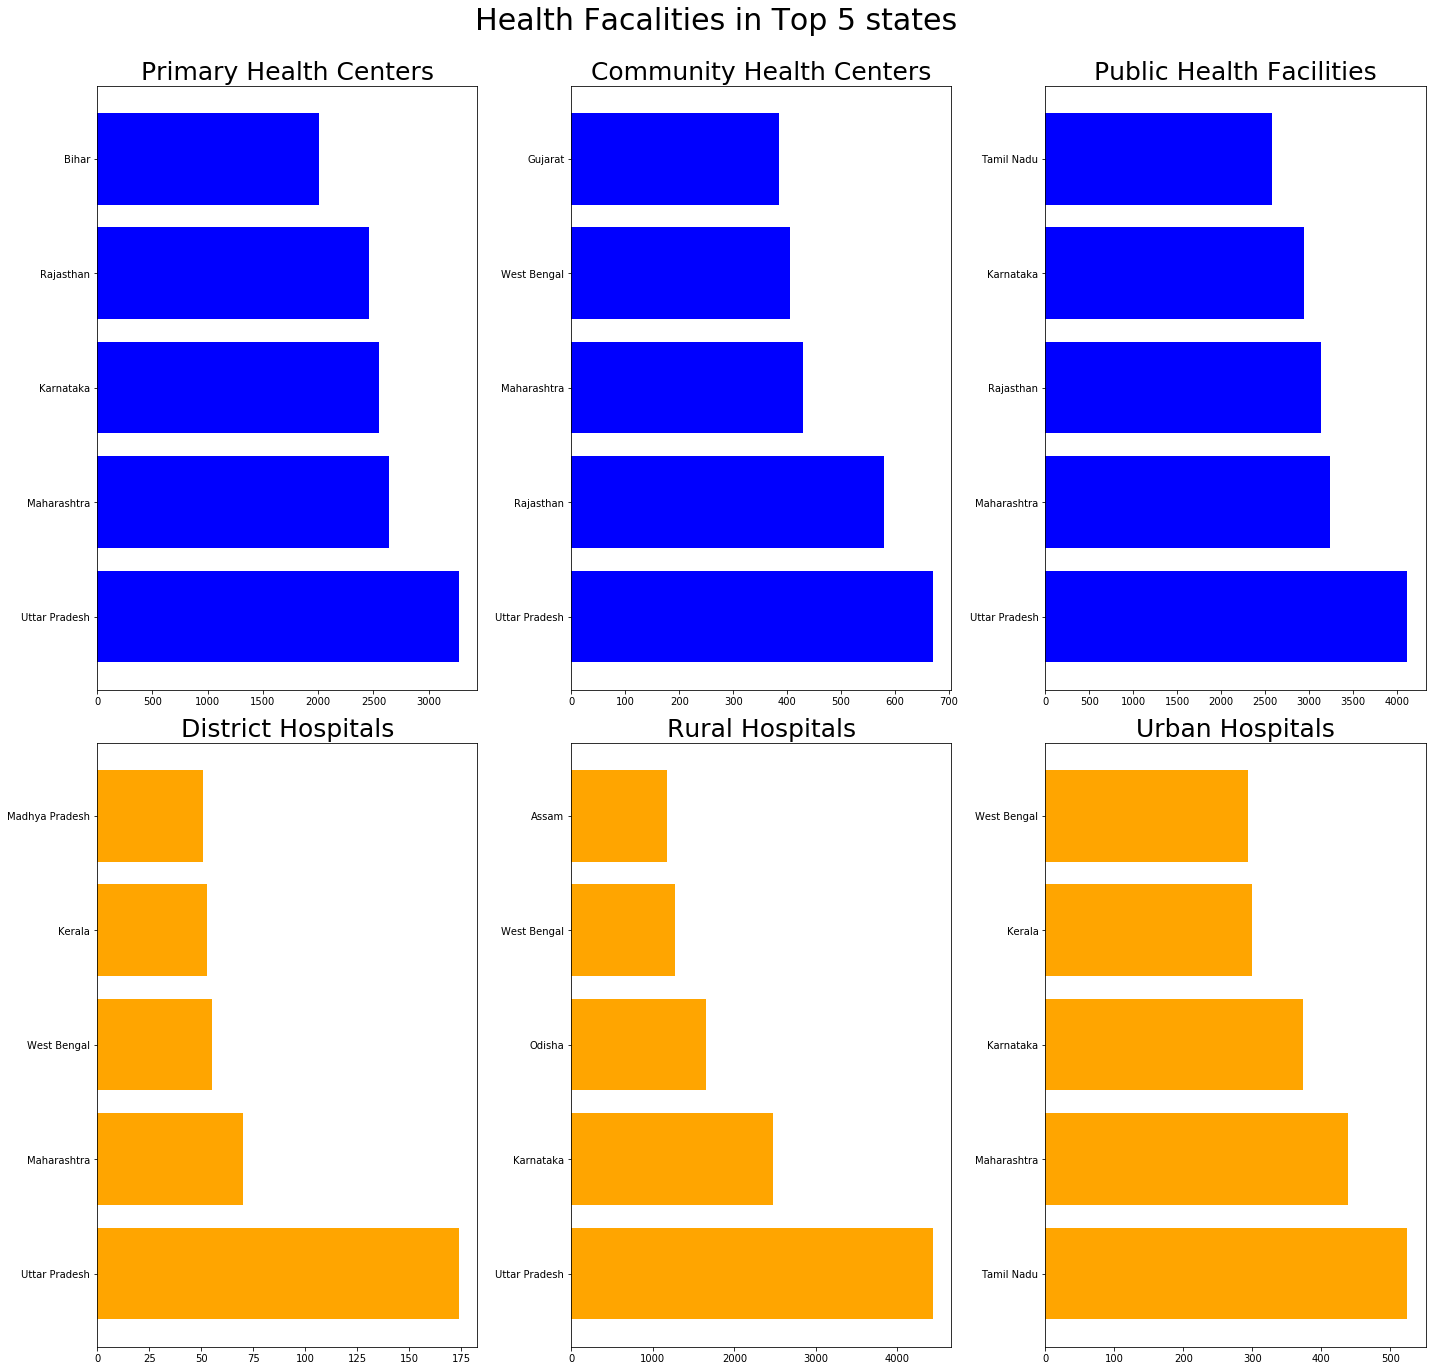

In [114]:
import plotly.graph_objects as go
hospital_beds_states =hospitals_beds.drop([36])
cols_object = list(hospital_beds_states.columns[2:8])
for cols in cols_object:
    hospital_beds_states[cols] = hospital_beds_states[cols].astype(int,errors = 'ignore')
top_5_primary = hospital_beds_states.nlargest(5,'NumPrimaryHealthCenters_HMIS')
top_5_community = hospital_beds_states.nlargest(5,'NumCommunityHealthCenters_HMIS')
top_5_district_hospitals = hospital_beds_states.nlargest(5,'NumDistrictHospitals_HMIS')
top_5_public_facility = hospital_beds_states.nlargest(5,'TotalPublicHealthFacilities_HMIS')
top_5_public_beds = hospital_beds_states.nlargest(5,'NumPublicBeds_HMIS')
top_rural_hos = hospital_beds_states.nlargest(5,'NumRuralHospitals_NHP18')
top_rural_beds = hospital_beds_states.nlargest(5,'NumRuralBeds_NHP18')
top_urban_hos = hospital_beds_states.nlargest(5,'NumUrbanHospitals_NHP18')
top_urban_beds = hospital_beds_states.nlargest(5,'NumUrbanBeds_NHP18')

plt.figure(figsize=(20,20))
plt.suptitle('Health Facalities in Top 5 states',fontsize=30)
plt.subplot(231)
plt.title('Primary Health Centers',fontsize=25)
plt.barh(top_5_primary['State/UT'],top_5_primary['NumPrimaryHealthCenters_HMIS'],color='blue')

plt.subplot(232)
plt.title('Community Health Centers',fontsize=25)
plt.barh(top_5_community['State/UT'],top_5_community['NumCommunityHealthCenters_HMIS'],color = 'blue')

plt.subplot(233)
plt.title('Public Health Facilities',fontsize=25)
plt.barh(top_5_public_facility['State/UT'],top_5_public_facility['TotalPublicHealthFacilities_HMIS'],color='blue')

plt.subplot(234)
plt.title('District Hospitals',fontsize=25)
plt.barh(top_5_district_hospitals['State/UT'],top_5_district_hospitals['NumDistrictHospitals_HMIS'],color = 'orange');

plt.subplot(235)
plt.title('Rural Hospitals',fontsize=25)
plt.barh(top_rural_hos['State/UT'],top_rural_hos['NumRuralHospitals_NHP18'],color = 'orange');

plt.subplot(236)
plt.title('Urban Hospitals',fontsize=25)
plt.barh(top_urban_hos['State/UT'],top_urban_hos['NumUrbanHospitals_NHP18'],color = 'orange');

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Statewise hospital beds for Covid-19 patients across India

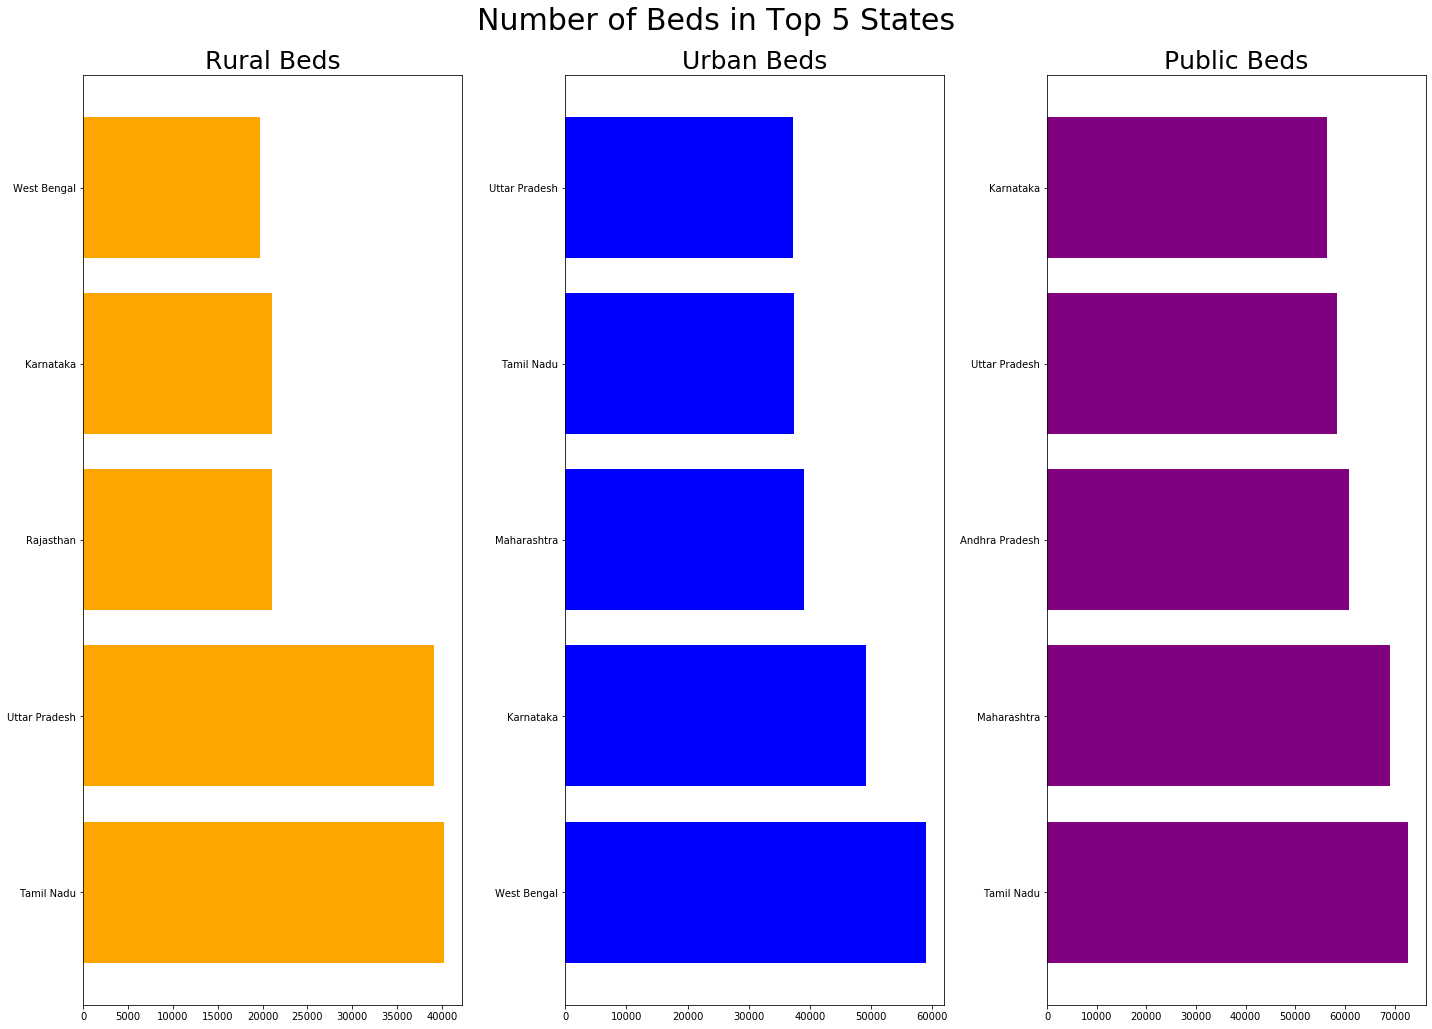

In [115]:
plt.figure(figsize=(20,15))

plt.suptitle('Number of Beds in Top 5 States',fontsize=30);
plt.subplot(131)
plt.title('Rural Beds',fontsize=25)
plt.barh(top_rural_beds['State/UT'],top_rural_beds['NumRuralBeds_NHP18'],color = 'orange');

plt.subplot(132)
plt.title('Urban Beds',fontsize=25)
plt.barh(top_urban_beds['State/UT'],top_urban_beds['NumUrbanBeds_NHP18'],color = 'blue');
plt.subplot(133)
plt.title('Public Beds',fontsize=25)
plt.barh(top_5_public_beds['State/UT'],top_5_public_beds['NumPublicBeds_HMIS'],color = 'purple');
plt.tight_layout(rect=[0, 0.03, 1, 0.95])